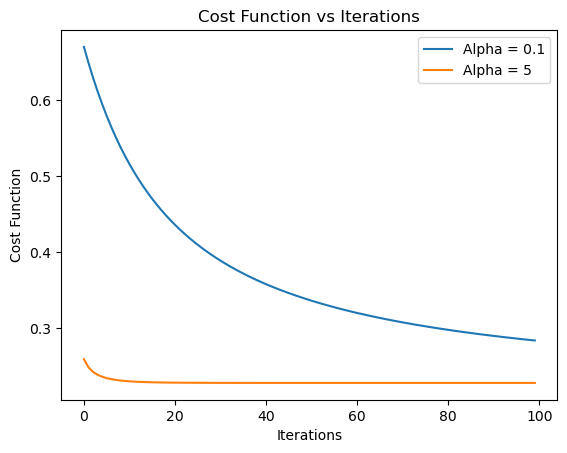

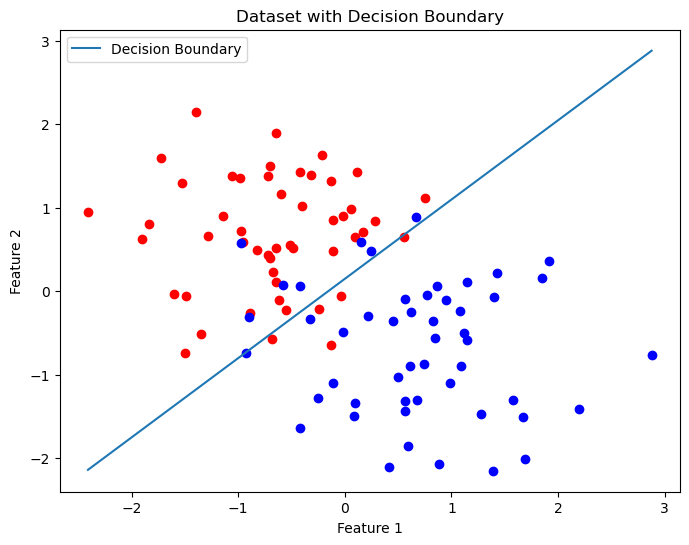

Confusion Matrix: TP=43, TN=45, FP=5, FN=7
Accuracy: 0.88
Precision: 0.8958333333333334
Recall: 0.86
F1 Score: 0.8775510204081632


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = pd.read_csv(r'C:\Users\KIIT\Downloads\logisticX.csv', header=None).values
Y = pd.read_csv(r'C:\Users\KIIT\Downloads\logisticY.csv', header=None).values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1 / m) * (np.dot(Y.T, np.log(h)) + np.dot((1 - Y).T, np.log(1 - h)))
    return cost[0][0]
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - Y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history
alpha_1 = 0.1
alpha_2 = 5
iterations = 100
initial_theta = np.zeros((X.shape[1], 1))
theta_1, cost_history_1 = gradient_descent(X, Y, initial_theta, alpha_1, iterations)
theta_2, cost_history_2 = gradient_descent(X, Y, initial_theta, alpha_2, iterations)
plt.plot(range(iterations), cost_history_1, label=f'Alpha = {alpha_1}')
plt.plot(range(iterations), cost_history_2, label=f'Alpha = {alpha_2}')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations')
plt.legend()
plt.show()
def plot_decision_boundary(X, Y, theta):
    plt.figure(figsize=(8, 6))
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X[i, 1], X[i, 2], 'ro')
        else:
            plt.plot(X[i, 1], X[i, 2], 'bo')
    x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_values = -(theta[0, 0] + theta[1, 0] * np.array(x_values)) / theta[2, 0]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Dataset with Decision Boundary')
    plt.show()
plot_decision_boundary(X, Y, theta_1)
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5
def confusion_matrix(Y, Y_pred):
    tp = np.sum((Y == 1) & (Y_pred == 1))
    tn = np.sum((Y == 0) & (Y_pred == 0))
    fp = np.sum((Y == 0) & (Y_pred == 1))
    fn = np.sum((Y == 1) & (Y_pred == 0))
    return tp, tn, fp, fn
Y_pred = predict(X, theta_1)
tp, tn, fp, fn = confusion_matrix(Y, Y_pred)
accuracy = (tp + tn) / len(Y)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
